### VERY Important  : XOR

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#tf.set_random_seed(777)  # for reproducibility 모든컴마다 우연의 효과를 똑같이 주기위해 지금은 필요없어서 막아놈

* Hyperparameters    이런조건을 가지고 학습해봐라고 사람이 주는 것

러닝레이트는 사람이 얼만큼씩 올릴지 결정.. 0.01씩 올리면 느려도 꼼꼼히 맞출거임. 만약 너무 크다면 어쩌면 금방맞추지만 못맞출수도
nb = 넘버 epoch 학습을 만번정도 해보자.



In [0]:
learning_rate = 0.1
nb_epoch = 10000

* Dataset

In [0]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [1],
          [1],
          [0]]

In [0]:
x_data = np.array(x_data, dtype=np.float32)   # 데이터를 넘파이의 도움을 받고자 이렇게 넣은거임.
y_data = np.array(y_data, dtype=np.float32)

In [5]:
X = tf.placeholder(tf.float32, [None, 2])  #두개가 들어가서
Y = tf.placeholder(tf.float32, [None, 1])   #하나가 나올거임

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')   # 2개가 들어가서 2개씩이니까 4개의 선   그리고 random_normal 은 평균이 0인 정규분포 중에 숫자를 아무거나 찍어보자는 것. 0일 확률이 제일 클거고/
b1 = tf.Variable(tf.random_normal([2]), name='bias1')   #받아주는 바이어스도 2개
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')  # 나온 두개가 들어가서 1개로 나올거고
b2 = tf.Variable(tf.random_normal([1]), name='bias2')  #받아주는 바이어스가 1개 즉 앞단과 뒷단의 숫자를 잘 맞춰서 3개를 바꿔줘야 하는 거임!
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)   # sigmoid 안에 어떤 숫자가 들어오든 0~1 사이로 묶어버림. 즉 0과 1로 나누는 문제를 푸는데에 좋음. 

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))  # 여기부터는 똑같 가설에서 정답을 빼서 다 제곱해서 평균을 냄
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)   #옵티마이저야 줄여줘봐. 코스트만 알려주면 미분하고 알아서 다 해줌. 이 옵티마이저도 여러개가 있음. 

In [0]:
# Launch graph 세션열고
sess = tf.Session()

In [0]:
# TensorFlow 변수들(variables) 초기화 (Initialization)시키고
sess.run(tf.global_variables_initializer())

In [9]:
vcost = []
vstep = []


for i in range(nb_epoch+1):     # 10000번을 돌리자
    sess.run(train, feed_dict={X: x_data, Y: y_data})  # 세션 안에 train 함수를 넣음 train은 데이터 안가지고 있음 data를 먹여야지. 이걸먹고 너가 학습해봐.이때 공급을 해주는 거임. 데이터가 많으면 잘라서 넣어줘야지. 안그러면 데이터 터지니까

    if i % 1000 ==0:
        c1 = sess.run(cost, feed_dict={X: x_data, Y: y_data})  # 이건 없어도 되지만 어떻게 돌아가는지 우리가 봐야지.  지금 거는 계속 똑같음. 세션 위에서 다 설정해주고 세션에서 돌리고
        print('step={} / cost={}'.format(i, c1))
        
        vcost.append(c1)
        vstep.append(i)

step=0 / cost=0.2501188814640045
step=1000 / cost=0.250014066696167
step=2000 / cost=0.24999094009399414
step=3000 / cost=0.2499706745147705
step=4000 / cost=0.24993962049484253
step=5000 / cost=0.2498754858970642
step=6000 / cost=0.24971525371074677
step=7000 / cost=0.24924778938293457
step=8000 / cost=0.24776428937911987
step=9000 / cost=0.24312067031860352
step=10000 / cost=0.23008739948272705


Text(0.5, 1.0, 'Cost')

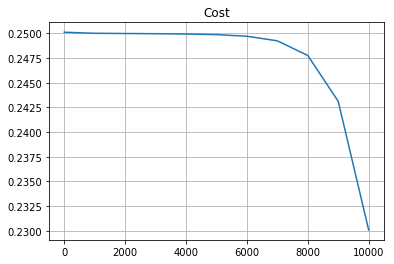

In [10]:
plt.plot(vstep,vcost) 
plt.grid()
plt.title('Cost')

* HW : 위의 코드를 변형하여 XOR 학습시 얻어진 Cost 그래프를 그리시오. Hint : List 사용

### Check the results  결국 구하는 애들은 W와 b를 학습한거고 그래서 코드에도 variable이라고 했었음

In [11]:
for i in range(4):
    x1 = x_data[[i], :]

    l1 = tf.sigmoid(tf.matmul(x1, W1) + b1)
    l2 = tf.sigmoid(tf.matmul(l1, W2) + b2)
    #l2cast = tf.cast(l2 > 0.5, dtype=tf.float32)
    print( i, sess.run(l2))
    #print( i, sess.run(l2), sess.run(l2cast), y_data[[i], :])   

0 [[0.47748277]]
1 [[0.41425195]]
2 [[0.6257389]]
3 [[0.45737046]]


### 참고 : Sigmoid

In [12]:
y1 = 1.0
y2 = sess.run(tf.sigmoid(y1))
print('{} --> {}'.format(y1, y2))

1.0 --> 0.7310585975646973


Sigmoid를 그려볼까요?

In [13]:
x1 = np.arange(-10,10, 0.5)
print(x1)

[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5]


In [14]:
y1 = sess.run(tf.sigmoid(x1))
print(y1)

[4.53978687e-05 7.48462275e-05 1.23394576e-04 2.03426978e-04
 3.35350130e-04 5.52778637e-04 9.11051194e-04 1.50118226e-03
 2.47262316e-03 4.07013772e-03 6.69285092e-03 1.09869426e-02
 1.79862100e-02 2.93122308e-02 4.74258732e-02 7.58581800e-02
 1.19202922e-01 1.82425524e-01 2.68941421e-01 3.77540669e-01
 5.00000000e-01 6.22459331e-01 7.31058579e-01 8.17574476e-01
 8.80797078e-01 9.24141820e-01 9.52574127e-01 9.70687769e-01
 9.82013790e-01 9.89013057e-01 9.93307149e-01 9.95929862e-01
 9.97527377e-01 9.98498818e-01 9.99088949e-01 9.99447221e-01
 9.99664650e-01 9.99796573e-01 9.99876605e-01 9.99925154e-01]


In [0]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sigmoid')

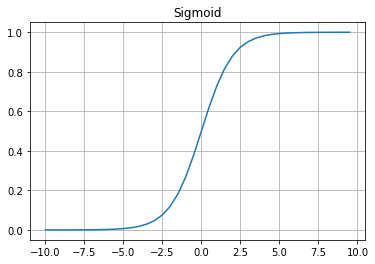

In [16]:
plt.plot(x1, y1)
plt.grid()
plt.title('Sigmoid')